## Rapport : Résolution de Problèmes / Machine Learning

#### IMT Mines Alès 2022
##### INFRES 13 
- **Quentin BIALOTA**
- **Tom L'HERMENIER**

![Logo IMT](https://www.fondation-mines-telecom.org/wp-content/uploads/2018/02/imt_mines_ales-300x158.jpg)

---

[//]: <> (Generally define your task)
[//]: <> (Analyse the corresponding dataset.)
[//]: <> (Define the problem as a Machine Learning problem.)
[//]: <> (Define the methodology and protocol you will use to tackle the problem.)
[//]: <> (Implement various approaches that are suited to this problem.)
[//]: <> (Discuss the results you have obtained.)
[//]: <> (Eventually recommend your final solution motivating it.)

Dans le cadre de du cours de **Résolution de Problèmes - Machine Learning** à l'IMT Mines Alès, nous avons réalisé un projet de notre choix, visant à résoudre un problème de machine learning, le tout en évaluant et comparant différents modèles pour la résolution du problème.

Dans ce projet, nous avons choisi de traiter une problématique visant à prédire un nombre de FPS (Frame Per Second / Image par Seconde), en fonction du jeu auquel on joue, et des différentes caractéristiques de l'ordinateur sur lequel on fait tourner le programme (Nom du processeur, nombre de coeurs, nombre de threads, nom de la carte graphique, ...)

---

Afin de traiter ce problème, nous avons décidé d'utiliser un dataset déjà existant et disponible sur le site OpenML. Ce dataset nommé `fps-in-video-game` est accessible au lien suivant : https://www.openml.org/d/42737.


##### Imports globaux
Avante toute chose, veuillez lancer la cellule suivante pour importer les librairies et outils utilisés dans ce rapport.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

from IPython.display import display

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

---

##### Import du dataset

Via la cellule suivante, vous pouvez importer le dataset depuis le site d'OpenML.

In [3]:
### Import du dataset depuis OpenML (lien du dataset : https://www.openml.org/d/42737)

dataset = sklearn.datasets.fetch_openml(name="fps-in-video-games")

### Informations sur le dataset

print("Informations sur le dataset : \n",dataset["DESCR"])

Informations sur le dataset : 
 **Author**: Sven Peeters  
**Source**: userbenchmark.com, fpsbenchmark.com, techpowerup.com - June 2020  
**Please cite**: TBA

# Achieved Frames per Second (FPS) in video games

This dataset contains FPS measurement of video games executed on computers. Each row of the dataset describes the outcome of FPS measurement (outcome is attribute FPS) for a video game executed on a computer. A computer is characterized by the CPU and the GPU. For both the name is resolved to technical specifications (features starting with Cpu and Gpu). The technical specification of CPU and GPU are technical specification that describe the factory state of the respective component. The game is characterized by the name, the displayed resolution, and the quality setting that was adjusted during the measurement (features starting with Game). In the following there is a short descriptions of the data sources and a description for each feature in the dataset.

## Source of Data

T

---

##### Structure du dataset :

Le dataset utilisé contient au total 44 caractéristiques (features) labélisées avec le nombre de FPS observé dans chaque cas, et au total ce dataset contient 425 833 observations.

Le problème principal de ces données, et qu'il y a beaucoup de valeurs non renseignées, voir même des colonnes entièrement vides (remplies de NaN). C'est pas exemple le cas `GpuNumberOfExecutionUnits` qui n'est pas renseignée pour quasiment toutes les observations.

Afin de voir au mieux ces données non renseignées, voici un récapitulatif (dans la cellule suivante) du nombre total de "trous" dans le dataset (valeur à NaN), ainsi que le nombre de "trous" par caractéristique.

Pour finir au niveau de la structure, nous avons pu remarquer beaucoup de duplicatas sur les inputs (valeurs de caractéristiques), avec des targets (valeurs cibles) différentes. De ce fait, on peut considérer d'or et déjà que ce dataset ne contient pas toutes les informations nécéssaires pour une meilleure prédiction du nombre de FPS. On peut par exemple penser à la RAM (mémoire vive) qui peut influer sur les FPS.

Nombre total de Nan dans le dataset :  1299988
Nombre de Nan pour chaque caracteristique : 
 [['CpuName' 0]
 ['CpuNumberOfCores' 0]
 ['CpuNumberOfThreads' 0]
 ['CpuBaseClock' 0]
 ['CpuCacheL1' 0]
 ['CpuCacheL2' 0]
 ['CpuCacheL3' 5055]
 ['CpuDieSize' 202534]
 ['CpuFrequency' 0]
 ['CpuMultiplier' 0]
 ['CpuMultiplierUnlocked' 0]
 ['CpuProcessSize' 0]
 ['CpuTDP' 0]
 ['CpuNumberOfTransistors' 226039]
 ['CpuTurboClock' 0]
 ['GpuName' 0]
 ['GpuArchitecture' 0]
 ['GpuBandwidth' 15441]
 ['GpuBaseClock' 0]
 ['GpuBoostClock' 0]
 ['GpuBus nterface' 0]
 ['GpuNumberOfComputeUnits' 357107]
 ['GpuDieSize' 11196]
 ['GpuDirectX' 0]
 ['GpuNumberOfExecutionUnits' 412935]
 ['GpuFP32Performance' 56]
 ['GpuMemoryBus' 15441]
 ['GpuMemorySize' 15441]
 ['GpuMemoryType' 15441]
 ['GpuOpenCL' 177]
 ['GpuOpenGL' 0]
 ['GpuPixelRate' 0]
 ['GpuProcessSize' 0]
 ['GpuNumberOfROPs' 0]
 ['GpuShaderModel' 5]
 ['GpuNumberOfShadingUnits' 56]
 ['GpuNumberOfTMUs' 0]
 ['GpuTextureRate' 0]
 ['GpuNumberOfTransistors' 11539]
 ['Gp

<AxesSubplot:title={'center':'Nombre de valeurs nulles par caractéristique'}, xlabel='Caractéristique (numero)', ylabel='Nombre de valeurs nulles'>

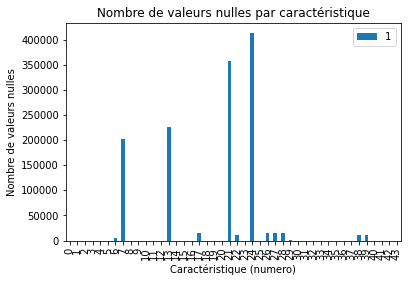

In [12]:
### Compte le nombre de NaN dans le dataset

bc_df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

tab = []
j = 0

for feature in bc_df.columns:
    tab.append(bc_df[feature].isna().sum())

print("Nombre total de Nan dans le dataset : ",bc_df.isna().sum().sum())
print("Nombre de Nan pour chaque caracteristique : \n",np.c_[bc_df.columns,tab])

print ("Sous forme de graphe :")
affiche = pd.DataFrame(np.c_[bc_df.columns,tab])
affiche.plot(kind='bar', title='Nombre de valeurs nulles par caractéristique', xlabel='Caractéristique (numero)', ylabel='Nombre de valeurs nulles')

##### Tri du dataset

Afin de pourvoir utiliser notre dataset, il nous faut le trier. D'une part car les valeurs NaN vont poser problème, et d'autre part car il y a un trop grand nombre d'observations pour traiter le problème dans des temps raisonnables sur nos ordinateurs.

Pour trier notre dataset, nous avons au à notre disposition deux méthodologies :
- Supprimer toutes les colonnes du dataset contenant des valeurs nulles (NaN), puis choisir dans les colonnes restantes, celles qui sont pertinentes.
- Supprimer la colonne `GpuNumberOfExecutionUnits` (car c'est une colonne contenant que des valeurs nulles), puis supprimer toutes les lignes contenant des valeurs nulles (NaN). Et comme pour la 1ere méthode, il faudra trier les colonnes pertinentes dans les colonnes restantes.

#### Suppression des colonnes contennants des valeurs nulles (NaN)

Dans notre dataset, certaines colonnes contiennent des valeurs non renseignées, nous avons donc décider de les supprimer.
Voici la liste :
- CpuCacheL3
- CpuDieSize
- CpuNumberOfTransistors
- GpuBandwidth
- GpuNumberOfComputeUnits
- GpuDieSize
- GpuNumberOfExecutionUnits
- GpuFP32Performance
- GpuMemoryBus
- GpuMemorySize
- GpuMemoryType
- GpuOpenCL
- GpuShaderModel
- GpuNumberOfShadingUnits
- GpuNumberOfTransistors
- GpuVulkan

In [1]:
bidule2 = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
bidule2 = bidule2.drop(
    columns=['GpuNumberOfExecutionUnits', 'GpuNumberOfComputeUnits','CpuNumberOfTransistors', 'CpuDieSize', 'CpuCacheL3','Dataset']).dropna()

bidule3 = bidule2.drop_duplicates(subset=bidule2.columns.difference(['target'])).reset_index().drop(columns=['index'])

%matplotlib inline

corr_matrix=bidule2.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5)

NameError: name 'pd' is not defined

In [ ]:
dataset_df = pd.DataFrame(data=np.c_[dataset.data, dataset.target], columns=dataset.feature_names+['target'])

dataset_df_reduced = dataset_df.dropna(axis='columns')

dataset_df_reduced_rows = dataset_df.drop(
    columns=['GpuNumberOfExecutionUnits', 'GpuNumberOfComputeUnits','CpuNumberOfTransistors', 'CpuDieSize', 'CpuCacheL3','Dataset']).dropna()

dataset_df_reduced_rows = dataset_df_reduced_rows.drop_duplicates(subset=dataset_df_reduced_rows.columns.difference(['target'])).reset_index().drop(columns=['index'])

dataset_df_reduced_rows_pivot = dataset_df_reduced_rows.pivot_table(columns=['GameName'], aggfunc='size')

print("Nombre de jeux : ",dataset_df_reduced_rows_pivot)


In [ ]:
dataset_copy = dataset_df_reduced_rows
dict_init = {}
for name, values in dataset_df_reduced_rows.iteritems():
    compt = 0
    tab = {}
    for i in range(values.size):
        if isinstance(dataset_copy[name][i], str):
            if dataset_copy[name][i] not in tab:
                tab[dataset_copy[name][i]] = compt
                dataset_copy[name][i] = compt
                compt += 1
            else:
                dataset_copy[name][i] = tab[dataset_copy[name][i]]
        else:
            break
    print(len(tab))
    dict_init[name] = tab

In [ ]:
dataset_df_reduced_rows = dataset_df_reduced_rows.sample(random_state=0, n=dataset_df_reduced_rows.shape[0])
X = dataset_df_reduced_rows.drop(columns=['target'])
y = dataset_df_reduced_rows['target']

#print(X.info())

# Simple

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

lr = LinearRegression().fit(X_train,y_train)

print("Training set score: {:.2f}".format(lr.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test,y_test)))

# plus complexe

pipeline = Pipeline([('transformer', scalar), ('estimator', LinearRegression())])

scores = cross_val_score(pipeline, X, y, cv=20)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
# print(lr.score(X_test, y_test))

pipeline = Pipeline([('transformer', scalar), ('estimator', Ridge(alpha=1.0))])

scores = cross_val_score(pipeline, X, y, cv=20)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

#clf = svm.SVC(kernel='linear', C=1, random_state=42)
#scores = cross_val_score(clf, X, y, cv=5)
#print(scores)